In [1]:
import os
import re
import sys
import numpy as np
from numpy import *
from pylab import *
import matplotlib.pyplot as plt
import time

import zipfile
import mne, re
import nibabel

from scipy import signal
from scipy.io import savemat

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors as mcolors
from IPython.display import HTML



In [2]:
#%pylab inline
%matplotlib notebook

In [3]:
path = '/Users/meysamhashemi/Work/Codes/PostdocCode/BayesiaCodes/FittingSEEG/Syntheticdata/'

In [4]:
contacts = []
seeg_idxs = []
channel_idx = 0
contacts_labels = []

with open(path+ 'data/complex.ades', 'r') as fd:
    for line in fd.readlines():
        parts = [p.strip() for p in line.strip().split('=')]
        if len(parts)>1 and parts[1] == 'SEEG':
            name, idx = re.match("([A-Za-z]+[']*)([0-9]+)", parts[0]).groups()
            idx = int(idx)
            contacts.append((name, idx))             
            seeg_idxs.append(channel_idx)
            contacts_labels.append(parts[0].upper())
            
            channel_idx += 1
 
    
bipnames = []
bipidx = []
for i in range(len(contacts)-1):
    (ln, li), (rn, ri) = contacts[i:i+2]
    if ln != rn:
        continue
    bipnames.append('%s%d-%d' % (ln, li, ri))
    bipidx.append((i, i+1))

In [5]:
reg_xyz = loadtxt(path+ 'data/centers.txt', usecols=(1,2,3))
reg_names = []
with open(path+ 'data/centers.txt', 'r') as fd:
    #for line in fd.readlines():
     #   reg_names.append(line.strip().split()[0])
    for i, line in enumerate(fd.readlines()):
        reg_names.append('r%03d-%s' % (i, line.strip().split()[0]))
#seg = nibabel.load('aparcaseg_2_diff_2.nii.gz')
#reg_xyz = seg.affine.dot(c_[reg_xyz, ones((reg_xyz.shape[0], ))].T)[:3].T


seeg_labels = []
seeg_xyz = loadtxt(path+ 'data/elecs_name.txt', usecols=(1,2,3))
with open(path+ 'data/elecs_name.txt', 'r') as fd:
    for line in fd.readlines():
        parts = line.strip().split()
        seeg_labels.append(parts[0].upper())
#print sorted(seeg_labels+[e+str(i) for e, i in contacts])
monopolar_chan_to_pos = []
for name, idx in contacts:
    monopolar_chan_to_pos.append(seeg_labels.index(name+str(idx)))
seeg_xyz = array([seeg_xyz[i] for i in monopolar_chan_to_pos])


In [6]:

selectednodes=array([ 0,  3,  6,  9, 20, 27, 29]) #nodes
r_selectednodes=reg_xyz[selectednodes]

Ps=array([50, 51, 67, 80, 93, 109] ) #contacts

selectedcontacts=[bipnames[c] for c in Ps]

ss=[]
sss=[]
for s in selectedcontacts:
    parts = s.strip().split('-')
    name, idx=re.match("([A-Za-z]+[']*)([0-9]+)", s).groups()
    idx = int(idx)
    #sss.append((name, idx))
    ss.append(parts[0].upper())
    
    
selectedcontacts_indices=[contacts_labels.index(c) for c in ss] 
r_selectedcontacts=seeg_xyz[selectedcontacts_indices]


In [7]:
print selectedcontacts

["FCA'12-13", "FCA'13-14", "CU'3-4", "PP'4-5", "PI'5-6", "PFG'9-10"]


<IPython.core.display.Javascript object>


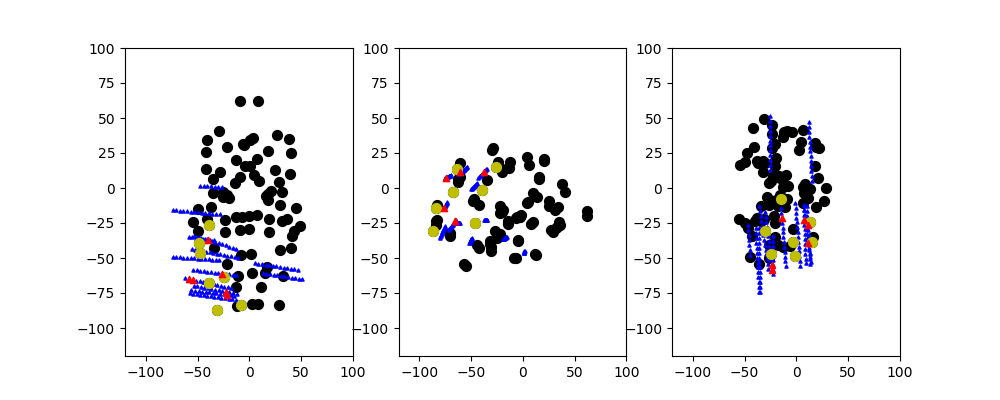

<IPython.core.display.Javascript object>


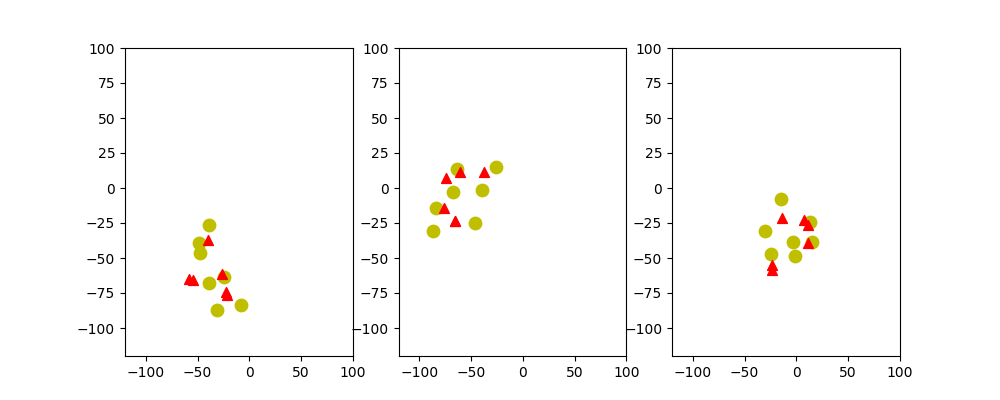

In [8]:
def plot_electrodes():
    x, y, z = zip(reg_xyz.T, seeg_xyz.T)
    for i, ((ra, sa), (rb, sb)) in enumerate([(x, y), (y, z), (z, x)]):
        subplot(1, 3, i + 1)
        scatter(ra, rb, color='k', s=50)
        scatter(sa, sb ,color='b',marker='^', s=5 )
    x, y, z = zip(r_selectednodes.T, r_selectedcontacts.T)
    for i, ((ra, sa), (rb, sb)) in enumerate([(x, y), (y, z), (z, x)]):
        subplot(1, 3, i + 1)
        scatter(ra, rb,color='y', s=50)
        scatter(sa, sb, color='r',marker='^', s=20)
        axis([-120, 100, -120, 100])
        #xticks([]), yticks([])
figure(figsize=(10, 4))

plot_electrodes()
plt.show()


def plot_selectedelectrodes():
    x, y, z = zip(r_selectednodes.T, r_selectedcontacts.T)
    for i, ((ra, sa), (rb, sb)) in enumerate([(x, y), (y, z), (z, x)]):
        subplot(1, 3, i + 1)
        scatter(ra, rb,color='y', s=80)
        scatter(sa, sb, color='r',marker='^', s=50)
        axis([-120, 100, -120, 100])
        #xticks([]), yticks([])
figure(figsize=(10, 4))
plot_selectedelectrodes()
plt.show()

<IPython.core.display.Javascript object>


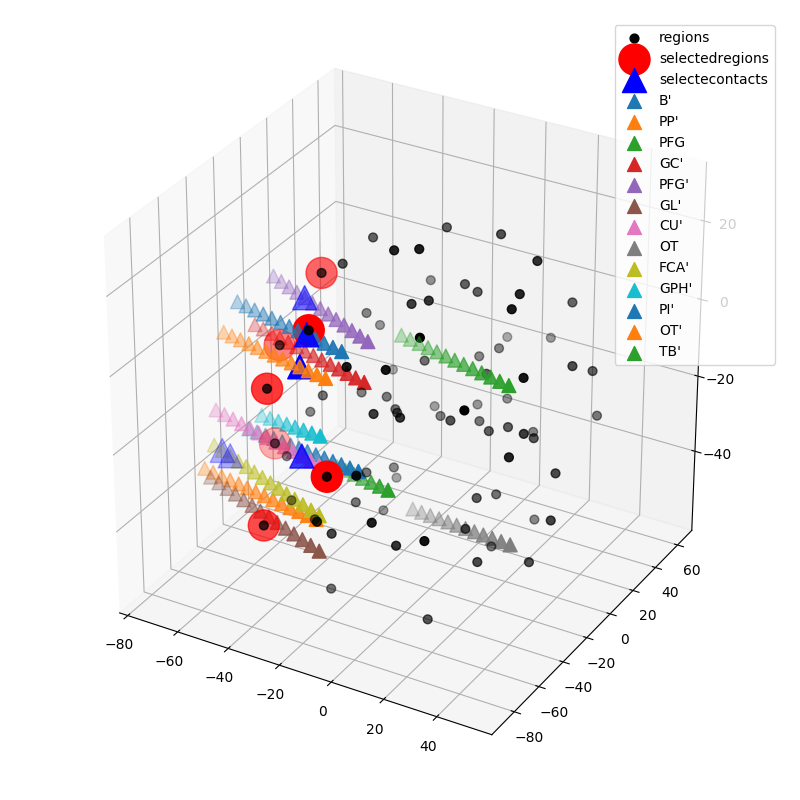

In [9]:
elecnames=[]
electrodes = {}  
with open(path+ 'data/elecs_name.txt', 'r') as fd:
            for i, line in enumerate(fd.readlines()):
                line = line.strip()
                contact, x, y, z = line.split()
                elecnames.append(contact)
                name, _ = re.match("([A-Za-z]+[']*)([0-9]+)", contact).groups()
                if name in electrodes:
                    electrodes[name].append(i)
                else:
                    electrodes[name] = [i]
                    
        
 
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(reg_xyz [:, 0], reg_xyz [:, 1], reg_xyz [:, 2], color='k', s=40, label='regions')
ax.scatter(r_selectednodes [:, 0], r_selectednodes [:, 1], r_selectednodes [:, 2], color='r', s=500, label='selectedregions')
ax.scatter(r_selectedcontacts [:, 0], r_selectedcontacts [:, 1], r_selectedcontacts [:, 2], color='b',marker='^', s=300, label='selectecontacts')


for name, idxs in electrodes.items():
    ax.scatter(seeg_xyz [idxs, 0], seeg_xyz [idxs, 1], seeg_xyz [idxs, 2],marker='^', s=100, label=name)
    

plt.legend()
plt.tight_layout()
plt.show()    